# IS590PR Week 12
## Algorithm Efficiency & Code Speed
Many computer science courses involve algorithm efficiency analysis. Here in IS590PR we want to make sure you're familiar with the concepts, common notation, and can evaluate efficiency for at least simple cases.

Note that **algorithm efficiency** a.k.a **algorithm complexity** is unrelated to which programming language, whether it was compiled, or what hardware the algorithm is running in.  Even though all of those considerations and several others will impact real performance of a program, the computational complexity is more an abstract mathematical description of the speed or memory requirements of an algorithm than a measurement.

In [1]:
import numpy as np
from time import process_time
import pandas as pd
%matplotlib inline

In [2]:
l3 = list(range(100))
l4 = list(range(1000))
l5 = list(range(10000))
l6 = list(range(100000))
l7 = list(range(1000000))
l8 = list(range(10000000))
l9 = list(range(100000000))

growing_lists = [l3, l4, l5, l6, l7, l8, l9]

In [3]:
a3  = np.arange(100)
a4  = np.arange(1000)
a5  = np.arange(10000)
a6  = np.arange(100000)
a7  = np.arange(1000000)
a8  = np.arange(10000000)
a9  = np.arange(100000000)

growing_arrays = [a3, a4, a5, a6, a7, a8, a9]

In [4]:
def time_a_function(function, data):
    """Iterate through the data samples list, recording performance of the function 
    with each sample.
    
    :param function: a function object
    :param data: a list of [list or np.array]
    :returns: pd.Series
    """
    results = {}       # create a dict of n vs. speed
    for item in data:  # loop through the data samples
        start_time = process_time()
        result = function(item)  # call the specified function with a sample from data
        elapsed_time = process_time() - start_time
        try:
            sample_size = len(item)
        except TypeError:
            sample_size = item  # it's not a list/array, but a specific value.
        print('With data size {:12d}, process run time was {:0.5f} sec.  Result: {}'.format(
            sample_size, elapsed_time, result))
        results[sample_size] = elapsed_time
    return pd.Series(results)

In [5]:
def python_sum(some_list):
    """Iterate through a list or array to compute the sum."""
    total = 0
    for x in some_list:
        total += x
    return total

## What is the algorithmic time complexity of the python_sum() function?

... discuss...

In [6]:
result = time_a_function(python_sum, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00005 sec.  Result: 499500
With data size        10000, process run time was 0.00042 sec.  Result: 49995000
With data size       100000, process run time was 0.00475 sec.  Result: 4999950000
With data size      1000000, process run time was 0.05391 sec.  Result: 499999500000
With data size     10000000, process run time was 0.47275 sec.  Result: 49999995000000
With data size    100000000, process run time was 4.63377 sec.  Result: 4999999950000000


# Graph the time performance for the python_sum() function above:

[Text(0,0.5,'run time (sec)'), Text(0.5,0,'(n) list/array size')]

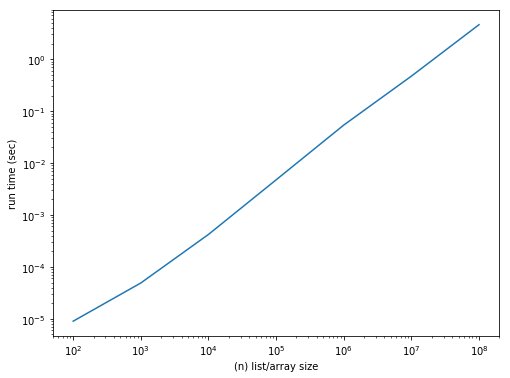

In [7]:
result.plot(use_index=True, loglog=True, figsize=(8,6)).set(
    xlabel='(n) list/array size', ylabel='run time (sec)')

## Is it possible to write a different algorithm for summing a list or array of numbers that has a better Big-Ɵ time?

... discuss...

## Note that the sample data above was sequential integers. If we knew that were always the case, then we definitely can optimize it like this:

In [8]:
def sequence_sum(some_list):
    """Given a list or array **known** to contain a sequence of equally-spaced integers 
    in sorted order, return the sum."""
    item_count = len(some_list)
    first = some_list[0]
    last  = some_list[-1]
    if item_count % 2 == 0:  
        # there is an even number of items
        return item_count // 2 * (first + last)
    else:
        middle_value = some_list[(item_count - 1) // 2]
        return (item_count - 1) // 2 * (first + last) + middle_value

In [9]:
print(sequence_sum([1, 2, 3, 4]))  # An even number of items
print(sequence_sum([1, 2, 3]))     # An odd number of items
print(sequence_sum([2, 3, 4]))     # Starting at 2
print(sequence_sum([1, 4, 7, 10])) # A sequence that skips, but constant intervals
print(sequence_sum(a3))            # the array from 0 to 999

10
6
9
22
4950


# What is Big-Ɵ of sequence_sum() above?  

In [10]:
def sum_every_third_item(some_list):
    """Iterate through a list or array to compute the sum of one third the items, at index positions 2, 5, 8, ..."""
    total = 0
    for i in range(2, len(some_list), 3):
        total += some_list[i]
    return total

In [11]:
print(sum_every_third_item([1, 2, 3, 4, 5, 6, 7]))  # add 3 + 6
print(sum_every_third_item([8, 10, 2, 5, 2, 1]))    # add 2 + 1
print(sum_every_third_item([2, 3, 4]))              # add 4
print(sum_every_third_item(a3))            # the array from 0 to 999

9
3
4
1650


# What is Big-Ɵ of sum_every_third_item() above?  

# Let's verify our Big-Ɵ analysis experimentally:

In [12]:
result = time_a_function(sequence_sum, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00001 sec.  Result: 499500
With data size        10000, process run time was 0.00000 sec.  Result: 49995000
With data size       100000, process run time was 0.00001 sec.  Result: 4999950000
With data size      1000000, process run time was 0.00000 sec.  Result: 499999500000
With data size     10000000, process run time was 0.00001 sec.  Result: 49999995000000
With data size    100000000, process run time was 0.00002 sec.  Result: 4999999950000000


In [13]:
result = time_a_function(sum_every_third_item, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 1650
With data size         1000, process run time was 0.00005 sec.  Result: 166500
With data size        10000, process run time was 0.00030 sec.  Result: 16665000
With data size       100000, process run time was 0.00271 sec.  Result: 1666650000
With data size      1000000, process run time was 0.03397 sec.  Result: 166666500000
With data size     10000000, process run time was 0.30653 sec.  Result: 16666665000000
With data size    100000000, process run time was 2.67898 sec.  Result: 1666666650000000


# record times to measure the run times for *several different* sum functions as _n_ increases:

In [14]:
curves = {}

In [15]:
curves['sequence_sum'] = time_a_function(sequence_sum, growing_lists)  # python_sum() on a LIST

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00000 sec.  Result: 499500
With data size        10000, process run time was 0.00000 sec.  Result: 49995000
With data size       100000, process run time was 0.00001 sec.  Result: 4999950000
With data size      1000000, process run time was 0.00001 sec.  Result: 499999500000
With data size     10000000, process run time was 0.00001 sec.  Result: 49999995000000
With data size    100000000, process run time was 0.00002 sec.  Result: 4999999950000000


In [16]:
curves['python_sum'] = time_a_function(python_sum, growing_lists)  # python_sum() on a LIST

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00005 sec.  Result: 499500
With data size        10000, process run time was 0.00048 sec.  Result: 49995000
With data size       100000, process run time was 0.00466 sec.  Result: 4999950000
With data size      1000000, process run time was 0.05625 sec.  Result: 499999500000
With data size     10000000, process run time was 0.48503 sec.  Result: 49999995000000
With data size    100000000, process run time was 4.60987 sec.  Result: 4999999950000000


### The next one uses Numpy ndarray.  So why is it SLOWER than above on an identical Python list?!

In [17]:
curves['python_sum_arr'] = time_a_function(python_sum, growing_arrays) # python_sum() on a Numpy NDARRAY

With data size          100, process run time was 0.00002 sec.  Result: 4950
With data size         1000, process run time was 0.00018 sec.  Result: 499500
With data size        10000, process run time was 0.00118 sec.  Result: 49995000
With data size       100000, process run time was 0.01320 sec.  Result: 4999950000
With data size      1000000, process run time was 0.12476 sec.  Result: 499999500000
With data size     10000000, process run time was 1.14439 sec.  Result: 49999995000000
With data size    100000000, process run time was 10.48328 sec.  Result: 4999999950000000


In [18]:
# Ignoring algorithmic complexity, compare the Numpy sum() function with 
# the pure Python loop above. 
curves['np.sum'] = time_a_function(np.sum, growing_arrays)

With data size          100, process run time was 0.00006 sec.  Result: 4950
With data size         1000, process run time was 0.00004 sec.  Result: 499500
With data size        10000, process run time was 0.00006 sec.  Result: 49995000
With data size       100000, process run time was 0.00046 sec.  Result: 4999950000
With data size      1000000, process run time was 0.00218 sec.  Result: 499999500000
With data size     10000000, process run time was 0.00819 sec.  Result: 49999995000000
With data size    100000000, process run time was 0.09369 sec.  Result: 4999999950000000


# Plot 1 of comparative performance.
The plot below is correct.  But notice that the x axis has smashed most of the data points together on the left?  That's because my array sizes are growing exponentially.  

In [19]:
# Convert my dictionary of timing results to a DataFrame for nice plotting:
df = pd.DataFrame(curves)
df

,sequence_sum,python_sum,python_sum_arr,np.sum
100,0.000006,0.000008,0.000022,0.000056
1000,0.000004,0.000052,0.000175,0.000038
10000,0.000003,0.000479,0.001183,0.000056
100000,0.000006,0.004665,0.013203,0.000461
1000000,0.000011,0.056245,0.124757,0.002185
10000000,0.000007,0.485025,1.144391,0.008194
100000000,0.000024,4.609867,10.483279,0.093687


[Text(0,0.5,'run time (sec)'), Text(0.5,0,'(n) list/array size')]

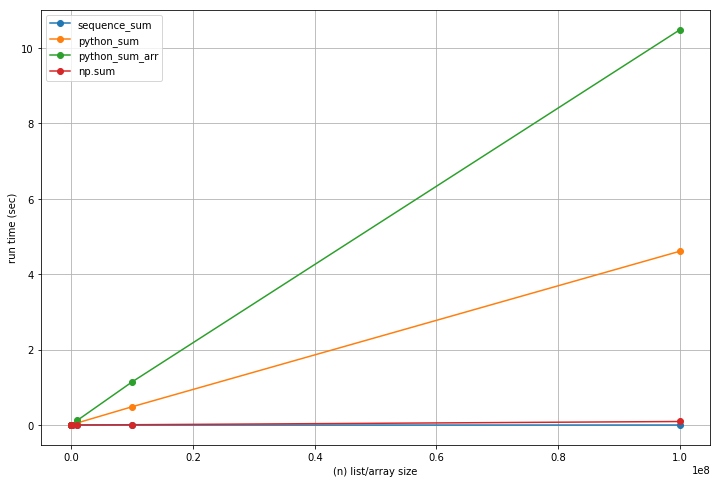

In [20]:
df.plot(use_index=True, legend=True, grid=True, figsize=(12,8), marker='o').set(
    xlabel='(n) list/array size', ylabel='run time (sec)')

# Plot 2 of comparative performance.
As stated above with Plot 1, because my sample sizes (n) were growing exponentially, we must use a logarithmic plot on X-axis or it'll skew the lines to the left edge.  But notice that we still can't distinguish their performance visually until we reached n=10,000,000! That's because the run times are also growing exponentially so they're still squashed together on the Y-axis. So check plot 3 for how to solve both problems.

[Text(0,0.5,'run time (sec)'), Text(0.5,0,'(n) list/array size')]

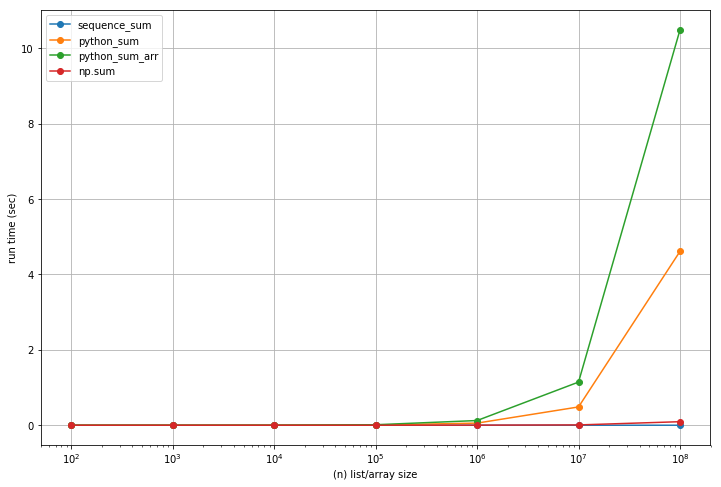

In [21]:
df.plot(use_index=True, logx=True, legend=True, grid=True, figsize=(12,8), marker='o').set(
    xlabel='(n) list/array size', ylabel='run time (sec)')

# Plot 3 of comparative performance.
Because the input sizes I supplied grow exponentially, the run times are also generally growing exponentially between each sample. Therefore we can *also* use a logarithmic plot on the y-axis to "straighten" that back out visually, for easier comparisons.  (logarithms are the inverse of exponents)

Same data as above, plotted with BOTH axes logarithmic, demonstrating confirmation that all the sum functions have linear complexity, a.k.a. Ɵ(n) except for the sequence_sum() function which is a constant-time algorithm Ɵ(1)

[Text(0,0.5,'run time (sec)'), Text(0.5,0,'(n) list/array size')]

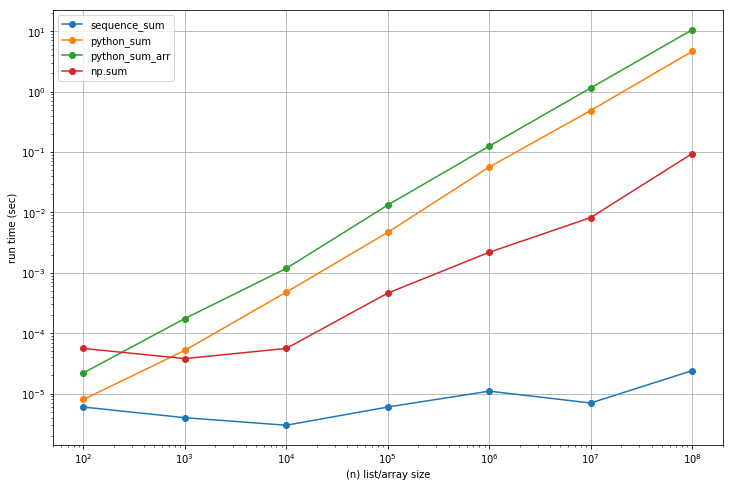

In [22]:
df.plot(use_index=True, loglog=True, legend=True, grid=True, figsize=(12,8), marker='o').set(
    xlabel='(n) list/array size', ylabel='run time (sec)')

# Selective Compilation

## If the **algorithm** we have can't be improved further, but it's still too slow, then we can turn to other optimization techniques like selective compilation using Cython or Numba.
Note though that there are tradeoffs between them and they don't always speed things up. Also in many cases, Numba won't be able to compile at all.

## Cython examples

In [23]:
%load_ext cython

In [24]:
%%cython --annotate
def cython_sum1(arr):
    total = 0
    for x in arr:
        total += x
    return total

In [25]:
curves['cython_sum1'] = time_a_function(cython_sum1, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00003 sec.  Result: 499500
With data size        10000, process run time was 0.00035 sec.  Result: 49995000
With data size       100000, process run time was 0.00311 sec.  Result: 4999950000
With data size      1000000, process run time was 0.03236 sec.  Result: 499999500000
With data size     10000000, process run time was 0.35439 sec.  Result: 49999995000000
With data size    100000000, process run time was 3.30430 sec.  Result: 4999999950000000


Notice that first Cython attempt wasn't a lot better than pure Python. We nearly always have to make some changes to get the speed improvements possible. Notice that nearly every line above in the "annotation output" had yellow highlighting.  Let's try adding some specific C-compatible type declarations to see what happens:

In [26]:
%%cython --annotate
def cython_sum2(arr):
    cdef long total = 0
    cdef long x
    for x in arr:
        total += x
    return total

In [27]:
curves['cython_sum2'] = time_a_function(cython_sum2, growing_lists)

With data size          100, process run time was 0.00001 sec.  Result: 4950
With data size         1000, process run time was 0.00005 sec.  Result: 499500
With data size        10000, process run time was 0.00023 sec.  Result: 49995000
With data size       100000, process run time was 0.00166 sec.  Result: 4999950000
With data size      1000000, process run time was 0.01926 sec.  Result: 499999500000
With data size     10000000, process run time was 0.23194 sec.  Result: 49999995000000
With data size    100000000, process run time was 1.79928 sec.  Result: 4999999950000000


Great! Declaring total and x as C-compatible long integers made a nice improvement. Just with that, it's now about 10X as fast as without Cython.  Next, let's try to declare that list parameter's type

In [28]:
%%cython --annotate
#cython: language_level=3, warn.undeclared=True
def cython_sum3(list arr):
    cdef long total = 0
    cdef long x
    
    for x in arr:
        total += x
    return total

In [29]:
curves['cython_sum3'] = time_a_function(cython_sum3, growing_lists)

With data size          100, process run time was 0.00000 sec.  Result: 4950
With data size         1000, process run time was 0.00005 sec.  Result: 499500
With data size        10000, process run time was 0.00018 sec.  Result: 49995000
With data size       100000, process run time was 0.00148 sec.  Result: 4999950000
With data size      1000000, process run time was 0.01919 sec.  Result: 499999500000
With data size     10000000, process run time was 0.21321 sec.  Result: 49999995000000
With data size    100000000, process run time was 1.61256 sec.  Result: 4999999950000000


## Numba

In [30]:
import numba 

@numba.jit
def numba_sum(arr):
    total = 0
    for x in arr:
        total += x
    return total

In [31]:
curves['numba_sum_lists'] = time_a_function(numba_sum, growing_lists)

With data size          100, process run time was 1.48085 sec.  Result: 4950
With data size         1000, process run time was 0.00003 sec.  Result: 499500
With data size        10000, process run time was 0.00014 sec.  Result: 49995000
With data size       100000, process run time was 0.00164 sec.  Result: 4999950000
With data size      1000000, process run time was 0.01947 sec.  Result: 499999500000
With data size     10000000, process run time was 0.19479 sec.  Result: 49999995000000
With data size    100000000, process run time was 2.05076 sec.  Result: 4999999950000000


In [32]:
curves['numba_sum_arrays'] = time_a_function(numba_sum, growing_arrays)

With data size          100, process run time was 0.07242 sec.  Result: 4950
With data size         1000, process run time was 0.00001 sec.  Result: 499500
With data size        10000, process run time was 0.00002 sec.  Result: 49995000
With data size       100000, process run time was 0.00008 sec.  Result: 4999950000
With data size      1000000, process run time was 0.00069 sec.  Result: 499999500000
With data size     10000000, process run time was 0.00774 sec.  Result: 49999995000000
With data size    100000000, process run time was 0.05724 sec.  Result: 4999999950000000


In [33]:
# Construct a single DataFrame from the dictionary containing multiple Pandas Series:
df = pd.DataFrame(curves)
df

,sequence_sum,python_sum,python_sum_arr,np.sum,cython_sum1,cython_sum2,cython_sum3,numba_sum_lists,numba_sum_arrays
100,0.000006,0.000008,0.000022,0.000056,0.000007,0.000005,0.000005,1.480849,0.072423
1000,0.000004,0.000052,0.000175,0.000038,0.000031,0.000052,0.000055,0.000029,0.000010
10000,0.000003,0.000479,0.001183,0.000056,0.000353,0.000226,0.000178,0.000140,0.000015
100000,0.000006,0.004665,0.013203,0.000461,0.003109,0.001656,0.001477,0.001637,0.000080
1000000,0.000011,0.056245,0.124757,0.002185,0.032361,0.019264,0.019192,0.019471,0.000693
10000000,0.000007,0.485025,1.144391,0.008194,0.354386,0.231944,0.213213,0.194789,0.007739
100000000,0.000024,4.609867,10.483279,0.093687,3.304301,1.799283,1.612556,2.050764,0.057239


# Plot of comparative performance, including Numba and Cython results.

###  The anomaly on the "numba_sum"...
where the first sample was very slow, is caused by the numba.jit "Just-In-Time" compiler analyzing and producing machine code.  If I re-run those calculations with the same Python kernel/interpreter session active, it will not have that delay.

[Text(0,0.5,'run time (sec)'), Text(0.5,0,'(n) list/array size')]

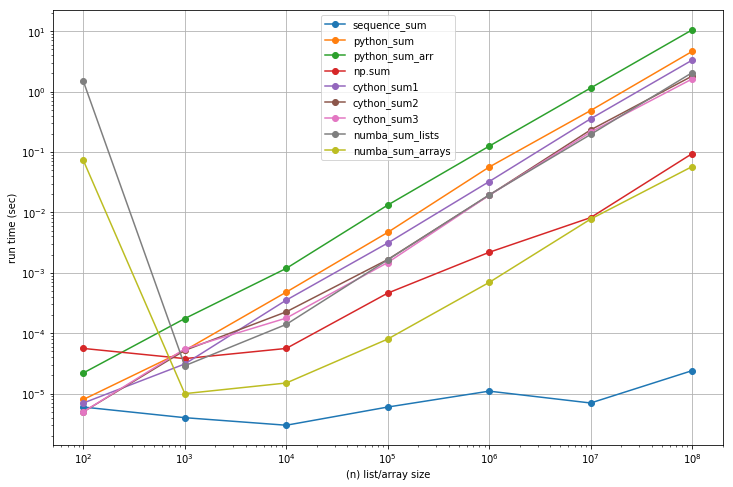

In [34]:
df.plot(use_index=True, loglog=True, legend=True, grid=True, figsize=(12,8), marker='o').set(
    xlabel='(n) list/array size', ylabel='run time (sec)')